In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

#### Specifiy csv file

In [2]:
df = pd.read_csv('./1DO-1DS/1DO-1DS_learning_rate.csv')

#### Getting and preparing data

In [14]:
dp = df.loc[df['dp_used'] == True]
no_dp = df.loc[df['dp_used'] == False]

dp_lrs = [0.001, 0.0015, 0.002, 0.0025, 0.003]
no_dp_lrs = [0.0001 , 0.0005, 0.001, 0.002, 0.005]

# Works for test_accs, test_losses, epsilons and alphas
def get_avg_values(col):
    dp_data = []
    no_dp_data = []

    for dp_lr, no_dp_lr in zip(dp_lrs, no_dp_lrs):
        dp_series = np.vstack(dp.loc[dp['learning_rate'] == dp_lr][col].apply(literal_eval))
        no_dp_series = np.vstack(no_dp.loc[no_dp['learning_rate'] == no_dp_lr][col].apply(literal_eval))

        dp_mean = np.mean(dp_series, axis=0)
        no_dp_mean = np.mean(no_dp_series, axis=0)

        dp_data.append(dp_mean)
        no_dp_data.append(no_dp_mean)
        
    return dp_data, no_dp_data
        
dp_data_loss, no_dp_data_loss = get_avg_values('test_losses')
dp_data_acc, no_dp_data_acc = get_avg_values('test_accs')

#### Plotting data

In [5]:
y = np.arange(30) + 1 

def make_plot(data, variable, xlabel='', ylabel='', title='', path=''):
    fig, ax = plt.subplots()
    for X, var in zip(data, variable):
        ax.plot(y, X, '--', label=var)
    ax.set(xlabel=xlabel, ylabel=ylabel , title=title)
    plt.legend()
    
    if path:
        fig.savefig(path)
    
    plt.show()

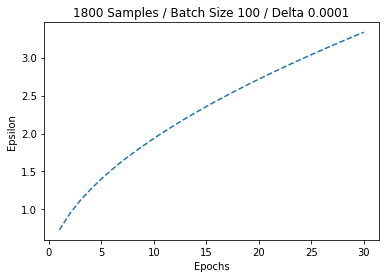

In [6]:
#make_plot([dp_data[0]], [""], xlabel="Epochs", ylabel="Epsilon",
#        title="1800 Samples / Batch Size 100 / Delta 0.0001", path="./1DO-1DS/FL_DP_epsilons_lr.jpg")

# make_plot(no_dp_data, no_dp_lrs, xlabel="Epochs", ylabel="Test Loss", 
#           title="Test Loss by Learning Rate (FL)", path="./1DO-1DS/FL_test_loss_lr.jpg")


In [13]:
print(dp_data_acc)

[array([0.17961165, 0.16893204, 0.17281553, 0.23300971, 0.31359223,
       0.3407767 , 0.36601942, 0.40776699, 0.46116504, 0.57572815,
       0.62621359, 0.69611651, 0.73009708, 0.76310679, 0.79611652,
       0.78446602, 0.78737864, 0.79320388, 0.76116506, 0.80194175,
       0.80291263, 0.80291264, 0.81650486, 0.81067963, 0.82815534,
       0.81165048, 0.83980583, 0.84757282, 0.83980583, 0.84271846])]


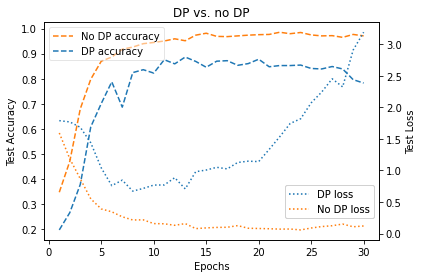

In [68]:
y = np.arange(30) + 1

data_acc = [dp_data_acc[3], no_dp_data_acc[3]]
variable_acc = ["DP", "no DP"]

data_loss = [dp_data_loss[3], no_dp_data_loss[3]]
variable_loss = ["DP Loss", "No DP Loss"]

fig, ax = plt.subplots()
for X, var in zip(data_acc, variable_acc):
    ax.plot(y, X, '--', )
ax.set(xlabel='Epochs', ylabel='Test Accuracy' , title='DP vs. no DP')

ax2 = ax.twinx()

for X, var in zip(data_loss, variable_loss):
    ax2.plot(y, X, ':', )
ax2.set(ylabel='Test Loss')

lines1 = ax.get_lines()
lines2 = ax2.get_lines()
legend1 = plt.legend([lines1[1], lines1[0]], ["No DP accuracy", "DP accuracy"], loc=2, framealpha=0.5)
legend2 = plt.legend([line for line in lines2], ["DP loss", "No DP loss"], loc=(0.72, 0.1))
fig.add_artist(legend1)
fig.add_artist(legend2)

#plt.savefig('./1DO-1DS/DP_vs_NODP.jpg')

plt.show()

